<a href="https://colab.research.google.com/github/fjadidi2001/Image_Inpaint/blob/main/Image_Inpaint_Nov29.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install datasets transformers opencv-python

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 480.6/480.6 kB 11.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 12.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 179.3/179.3 kB 18.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 14.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 19.8 MB/s eta 0:00:00
  Attempting uninstall: fsspec
    Found existing installation: fsspec 2024.10.0
    Uninstalling fsspec-2024.10.0:
      Successfully uninstalled fsspec-2024.10.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
gcsfs 2024.10.0 requires fsspec==2024.10.0, but you have fsspec 2024.9.0 which is incompatible.


In [2]:
from datasets import load_dataset
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
ds = load_dataset("saitsharipov/CelebA-HQ")

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


README.md:   0%|          | 0.00/224 [00:00<?, ?B/s]

(…)-00000-of-00003-30fbdf94a5d8e722.parquet:   0%|          | 0.00/464M [00:00<?, ?B/s]

(…)-00001-of-00003-74b418aa7a721747.parquet:   0%|          | 0.00/464M [00:00<?, ?B/s]

(…)-00002-of-00003-4f9459a488896f53.parquet:   0%|          | 0.00/465M [00:00<?, ?B/s]

Generating train split:   0%|          | 0/202599 [00:00<?, ? examples/s]

In [4]:
if ds is None:
    raise ValueError("Dataset not loaded correctly")

In [5]:
print(ds)
print(ds['train'][0])  # Example of accessing the first image

DatasetDict({
    train: Dataset({
        features: ['image'],
        num_rows: 202599
    })
})
{'image': <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=178x218 at 0x7F9B2AD7B850>}


## Randomly select 1000 images from the dataset for inpainting use:

In [6]:
selected_images = ds['train'].shuffle(seed=42).select(range(1000))

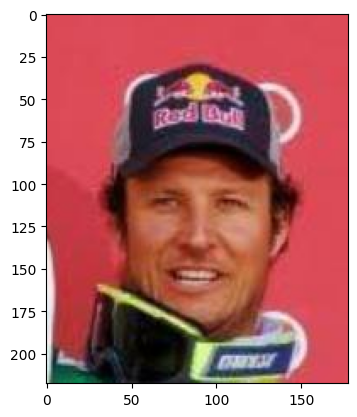

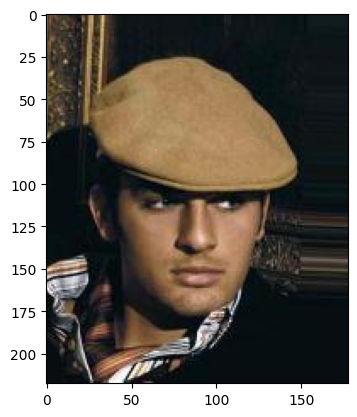

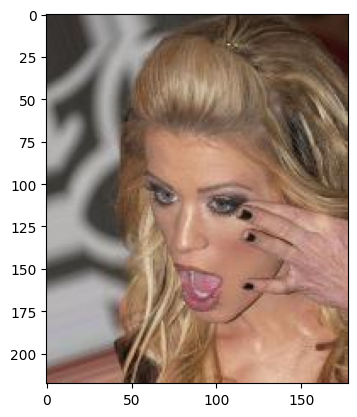

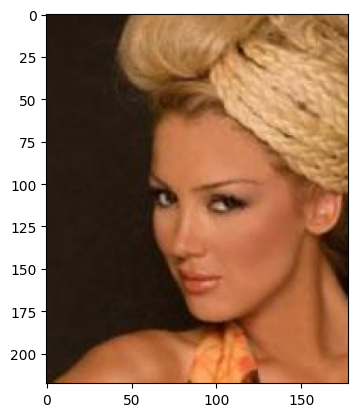

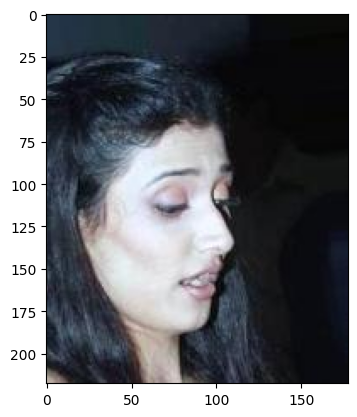

In [8]:
for i in range(5):
    plt.imshow(selected_images[i]['image'])
    plt.show()

In [10]:
import random
import cv2
import numpy as np # Import numpy
from PIL import Image

def create_mask(image):
    # Convert PIL Image to NumPy array
    image = np.array(image)
    height, width, _ = image.shape
    mask = np.zeros((height, width), dtype=np.uint8)
    mask_height = random.randint(height // 4, height // 2)
    mask_width = random.randint(width // 4, width // 2)
    mask_x = random.randint(0, width - mask_width)
    mask_y = random.randint(0, height - mask_height)
    mask[mask_y:mask_y + mask_height, mask_x:mask_x + mask_width] = 255
    return mask

masks = [create_mask(img['image']) for img in selected_images]

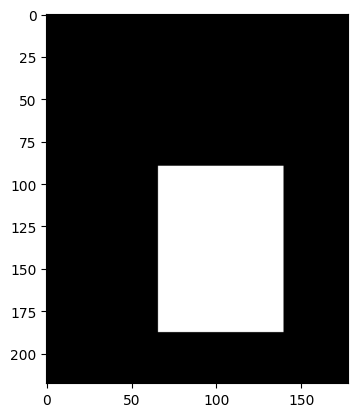

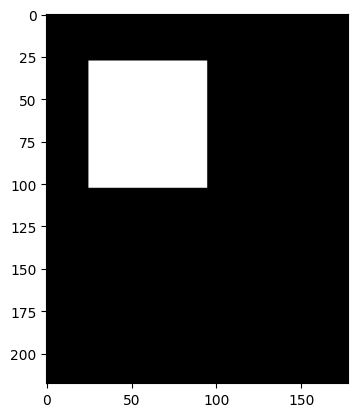

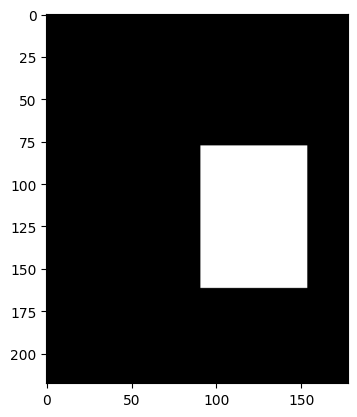

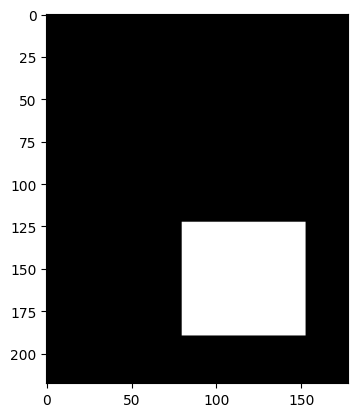

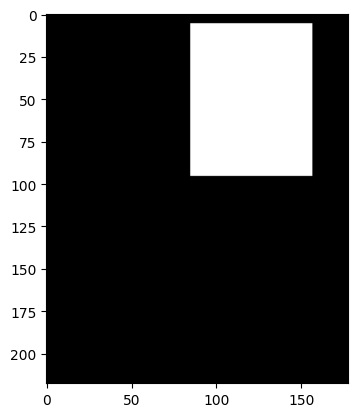

In [11]:
for i in range(5):
    plt.imshow(masks[i], cmap='gray')
    plt.show()